# Advanced Regression Model Building Assignment

### Importing the necessary libraries

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### Importing the Data set.

In [182]:
realestate = pd.read_csv('train.csv', index_col = 'Id')
realestate.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [183]:
realestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [184]:
realestate.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Segregating the data into Numeric and Categorical dataframes

In [185]:
numeric_df = realestate.select_dtypes(include=['int64', 'float64'])
categorical_df = realestate.select_dtypes(include=['object'])

In [186]:
numeric_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [187]:
categorical_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Checking the correlation between the parameters in numeric data

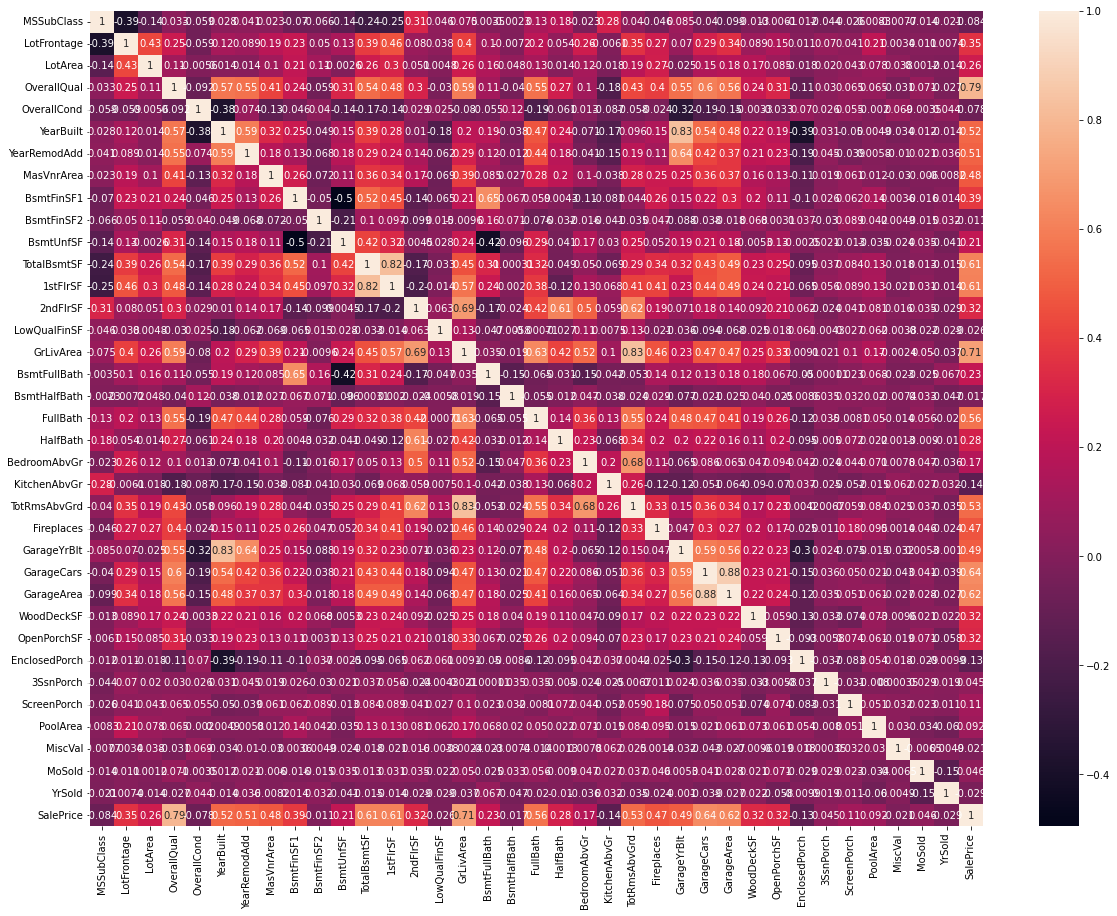

In [188]:
plt.figure(figsize=(20,15))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

#### Checking for outliers in numeric data

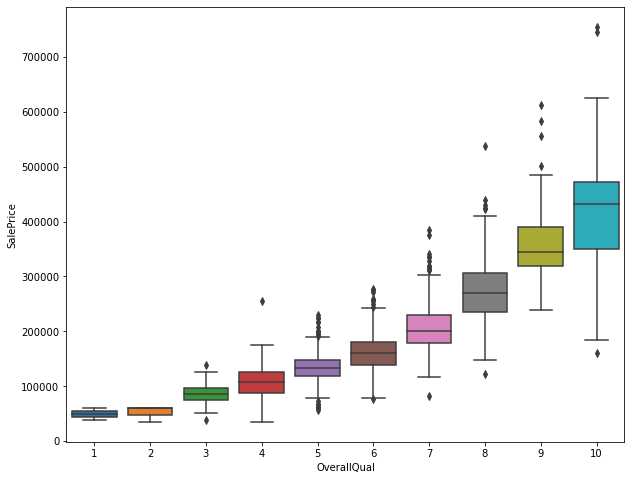

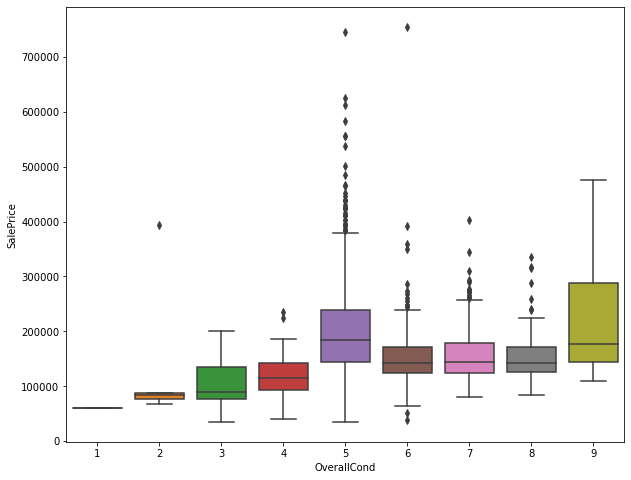

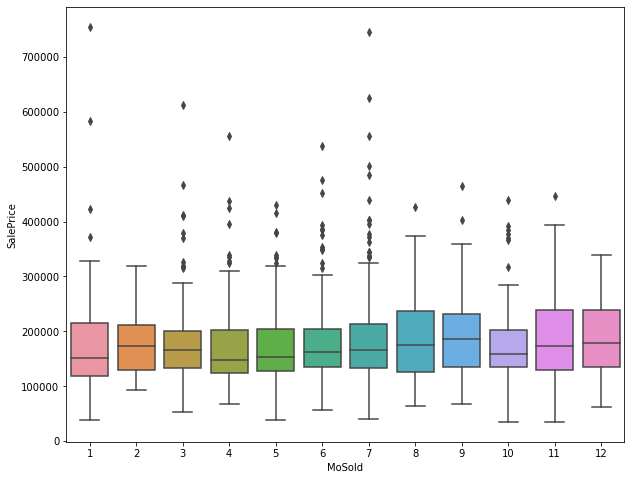

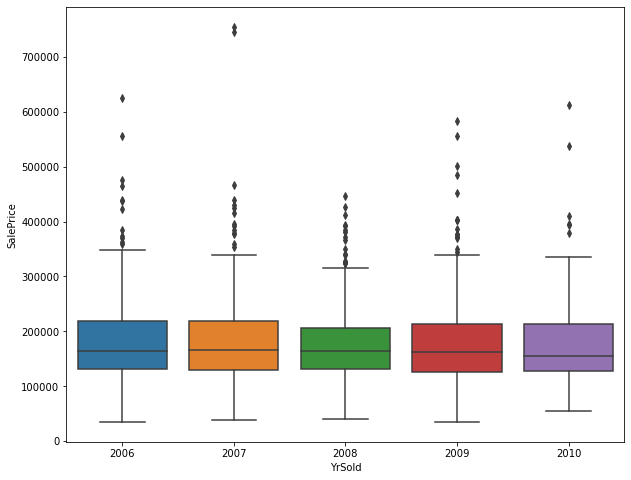

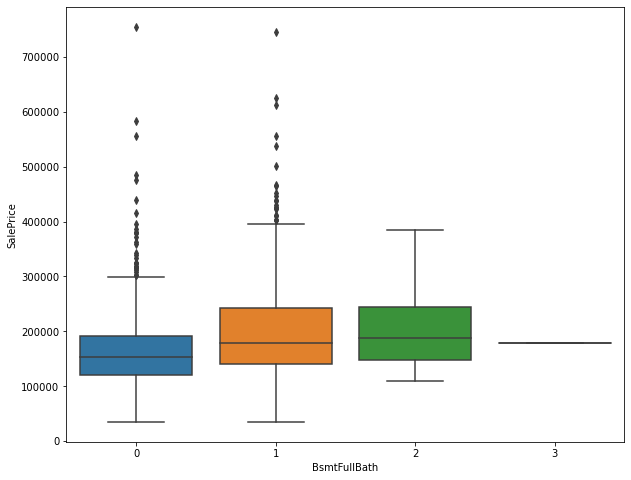

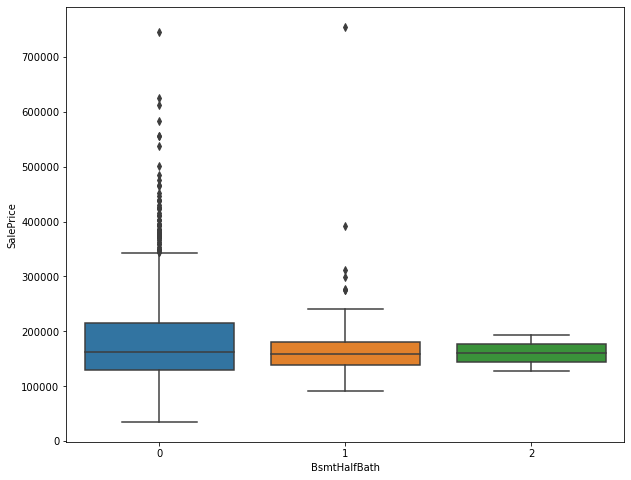

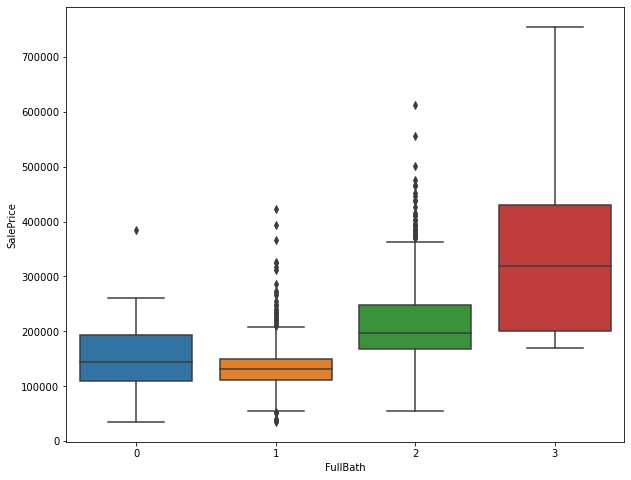

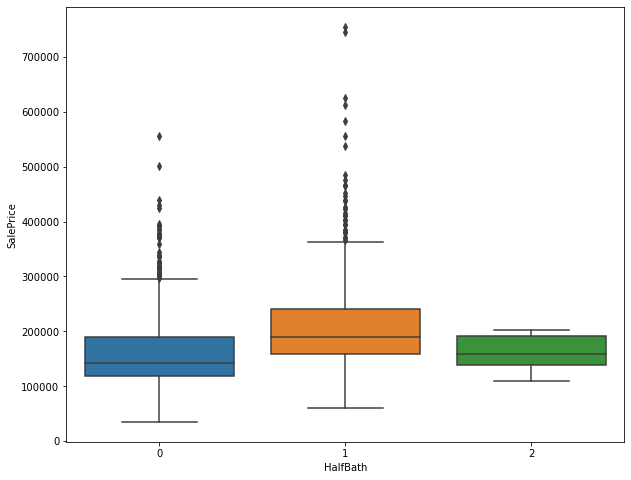

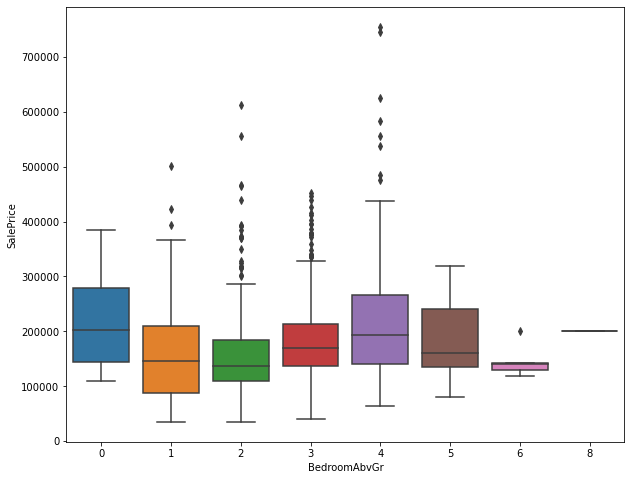

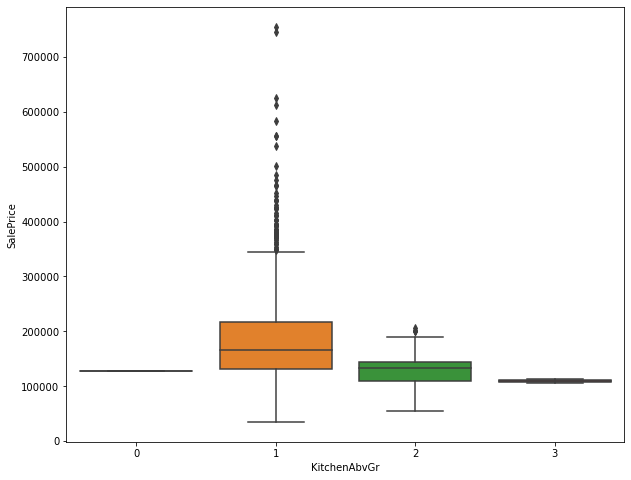

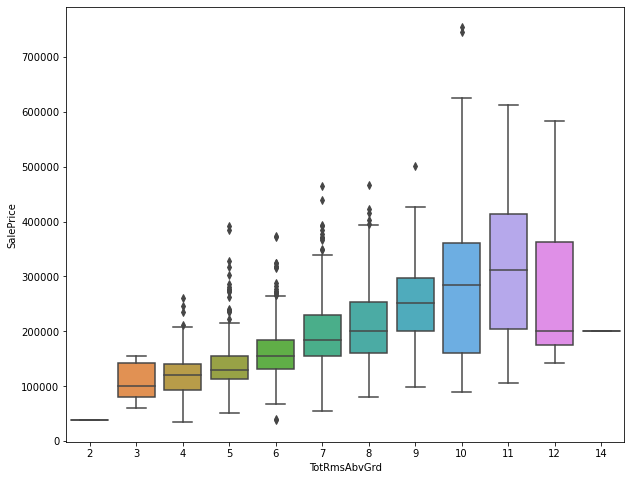

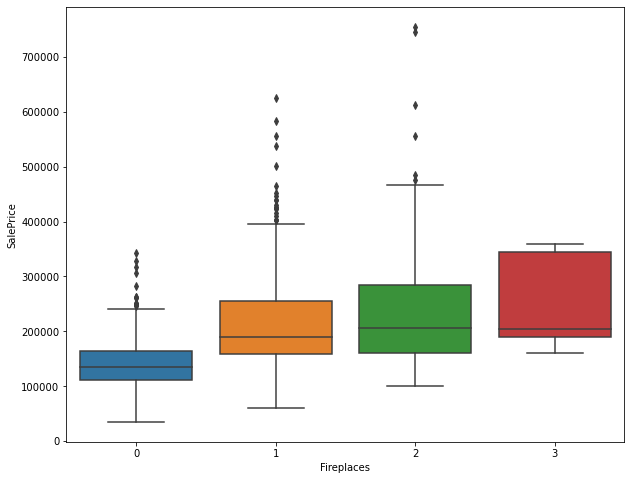

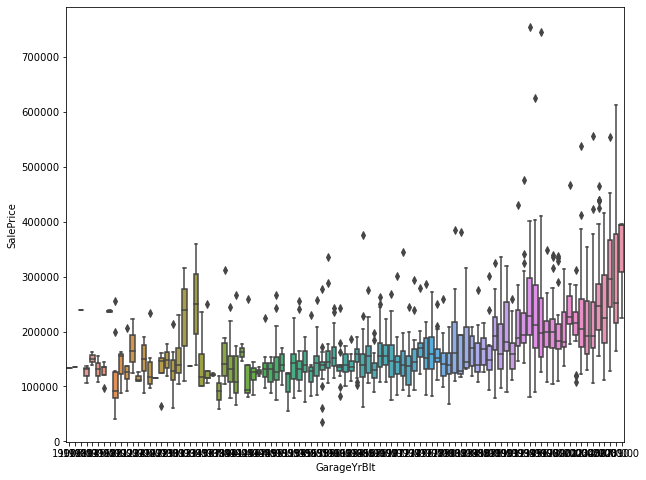

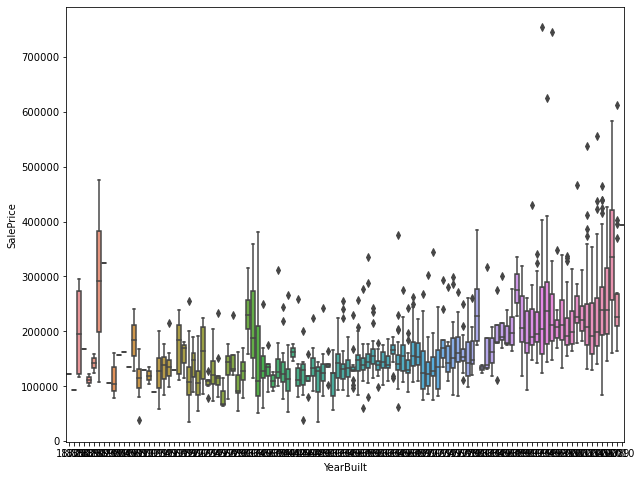

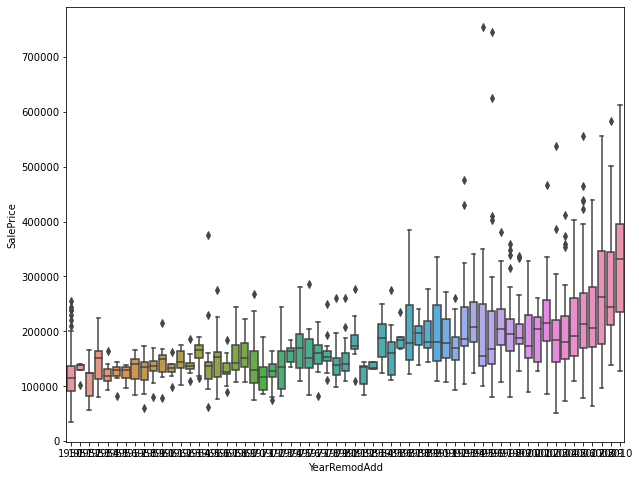

In [189]:
for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.figure(figsize = (10,8))
    sns.boxplot(realestate[feature], realestate['SalePrice'])
    plt.show()

From the above the boxplots it is observed that there considerable amount of outliers in most of the discrete features

In [190]:
# checking the percentage of outlier in every numeric feature
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
29,EnclosedPorch,14.25
9,BsmtFinSF2,11.44
4,OverallCond,8.56
31,ScreenPorch,7.95
0,MSSubClass,7.05
7,MasVnrArea,6.58
1,LotFrontage,6.03
17,BsmtHalfBath,5.62
28,OpenPorchSF,5.27
2,LotArea,4.73


#### Reassigning the minimum and maximum value after consideration of outliers

In [191]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = realestate[feature].quantile(.75) - realestate[feature].quantile(.25) 
        max_value = realestate[feature].quantile(.75)+1.5*IQR
        min_value = realestate[feature].quantile(.25)-1.5*IQR
        realestate[feature][realestate[feature] > max_value] = max_value
        realestate[feature][realestate[feature] < min_value ] = min_value

In [192]:
realestate.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.0,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,0.0,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,0.0,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.0,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,0.0,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


#### Univariate and Bivariate analysis

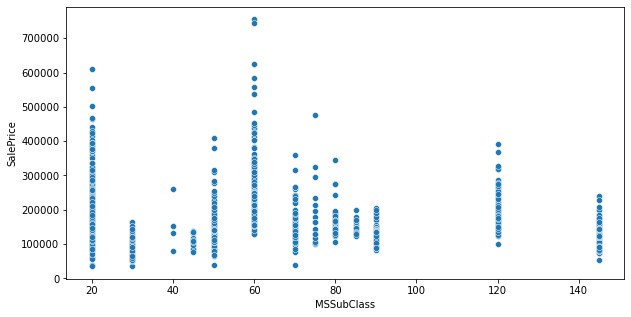

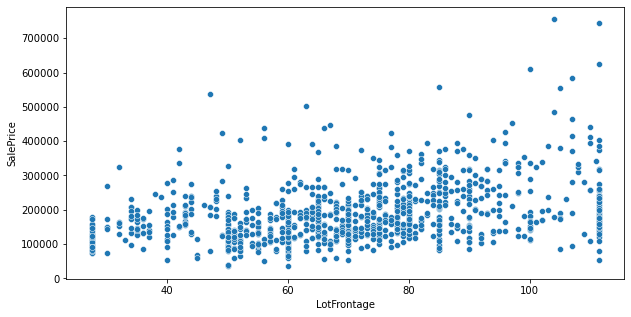

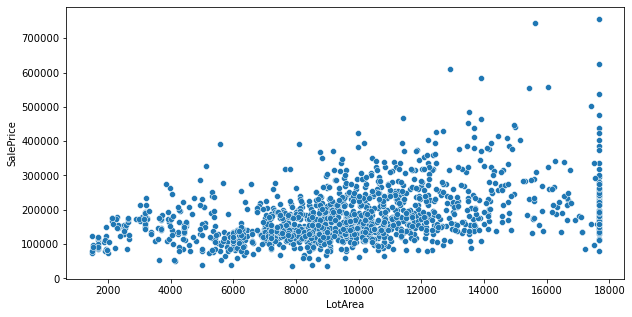

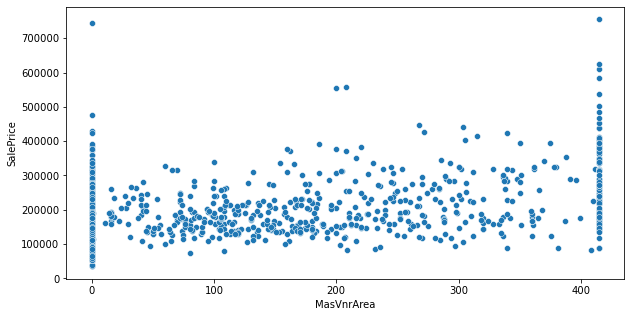

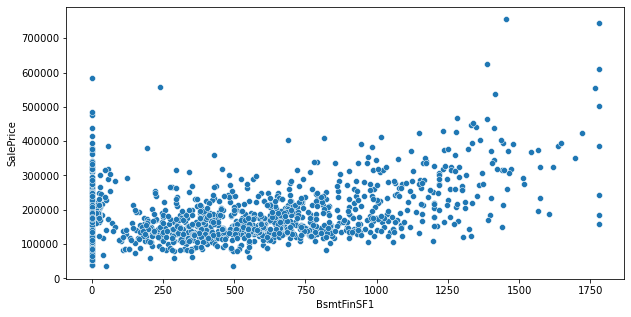

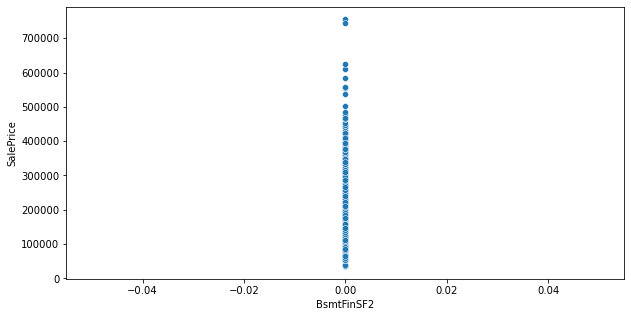

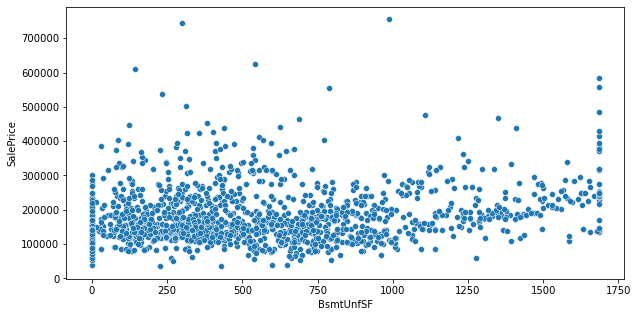

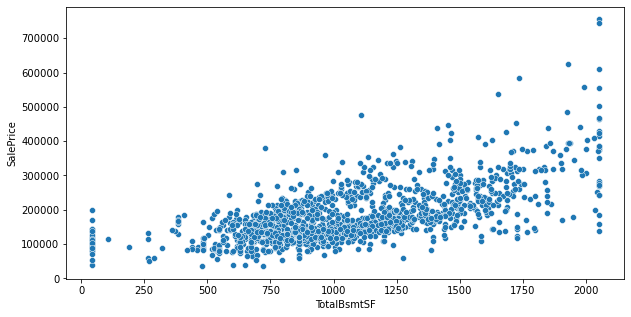

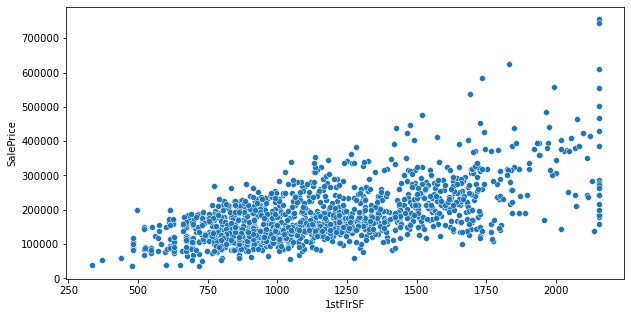

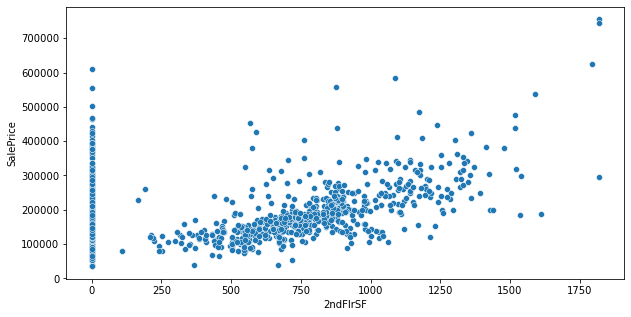

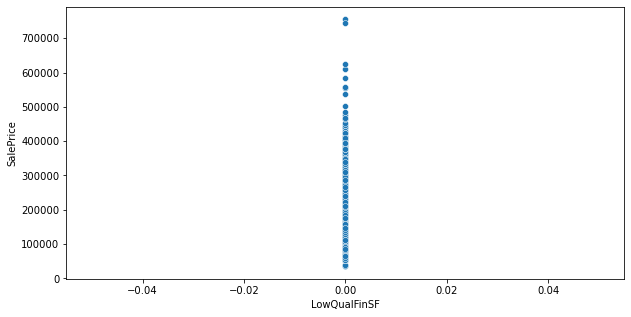

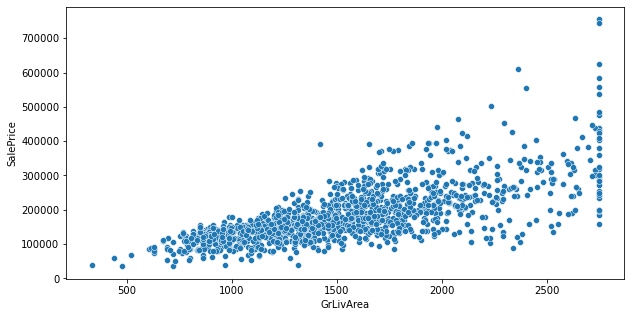

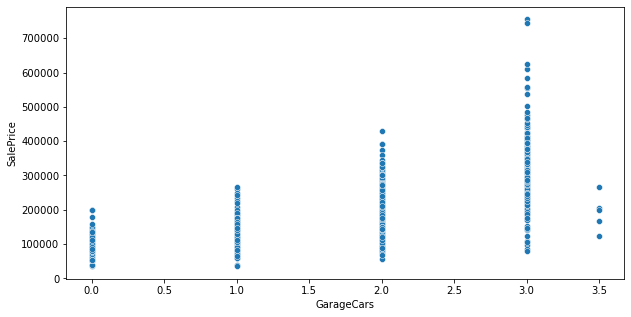

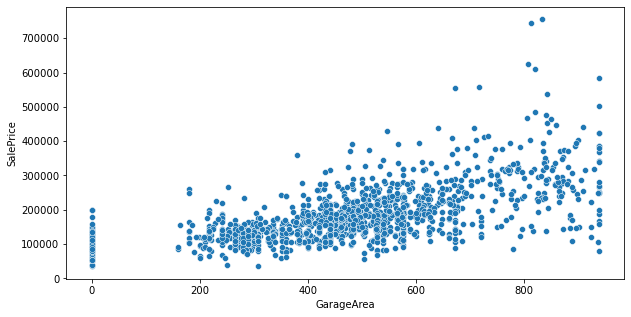

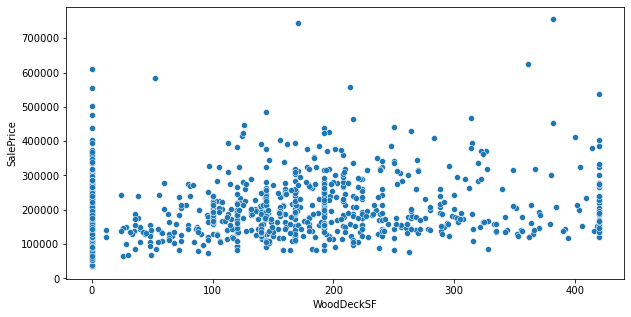

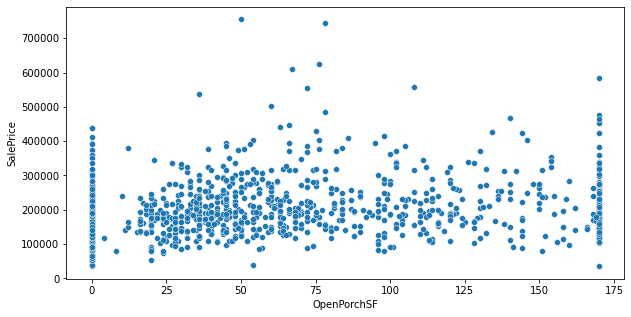

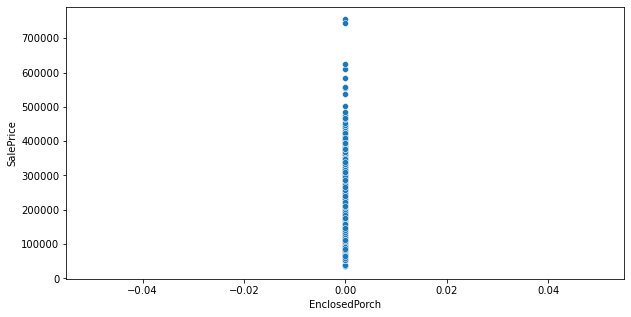

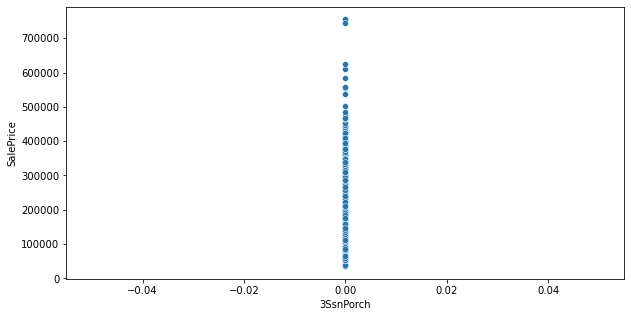

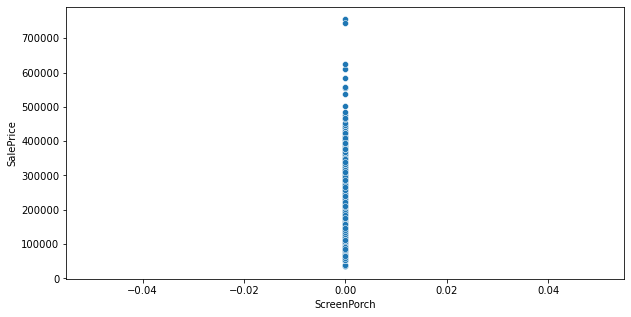

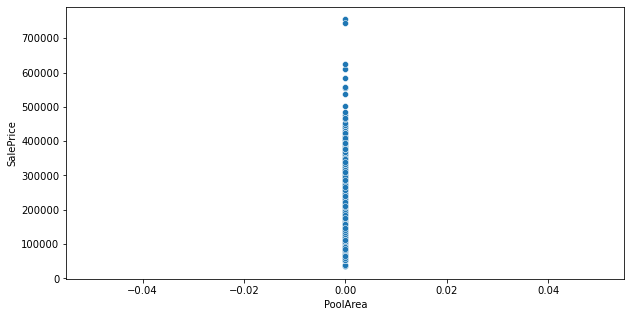

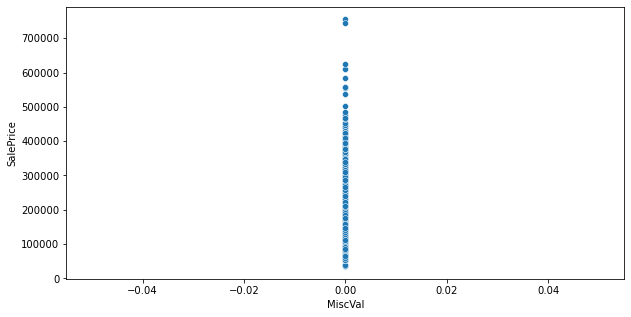

In [193]:
for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']):
    plt.figure(figsize = (10,5))
    sns.scatterplot(realestate[feature], realestate['SalePrice'])
    plt.show()

It is observed from the above plots that the following features['BsmtSF2','LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] have a single value which is equal to 0 thus not contributing towards the model building or analysis hence they can be dropped

#### Visualizing the discrete features on distribution plot

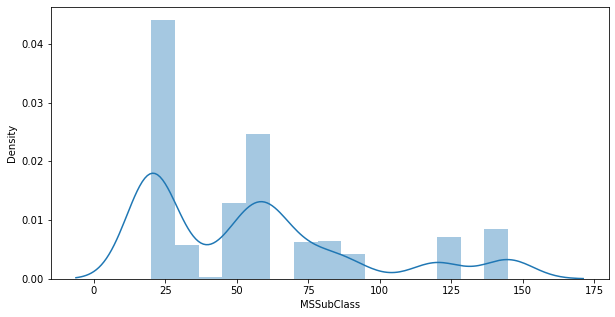

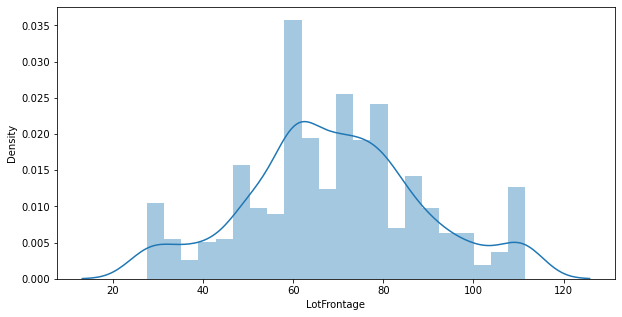

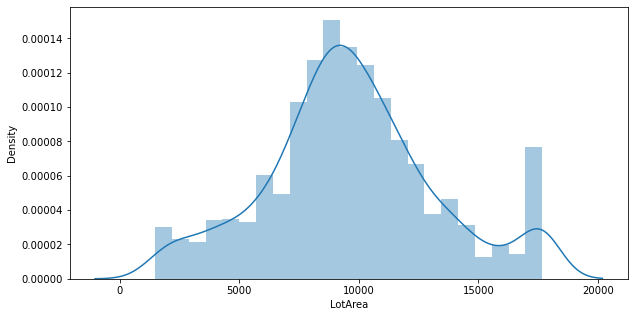

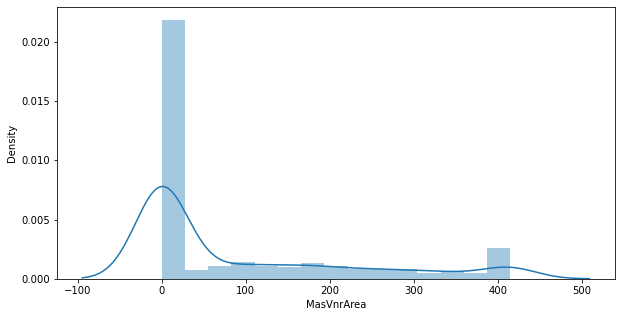

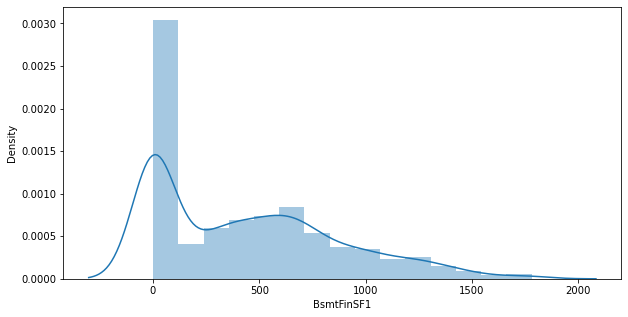

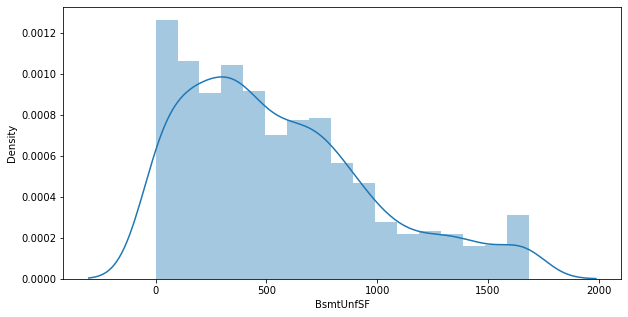

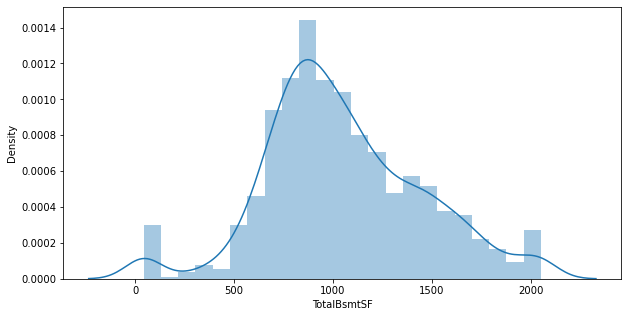

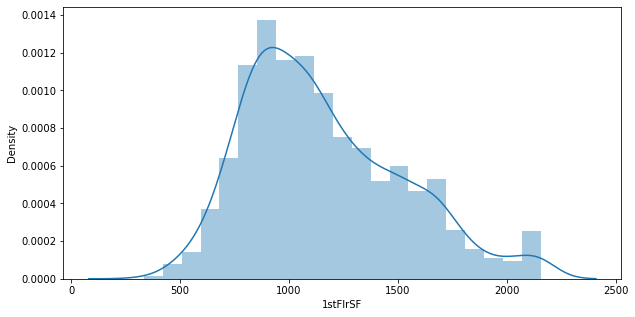

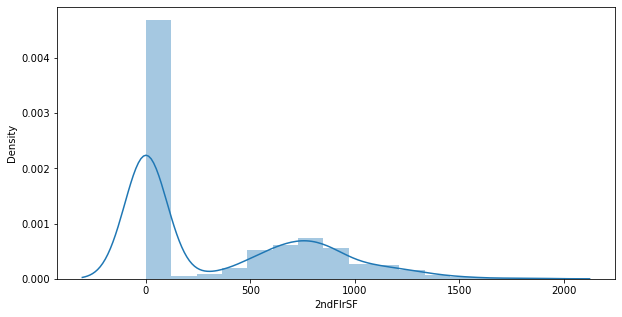

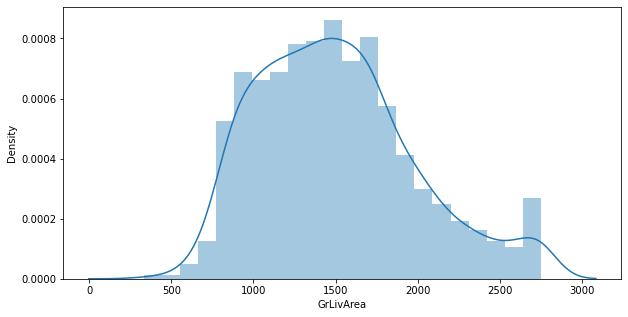

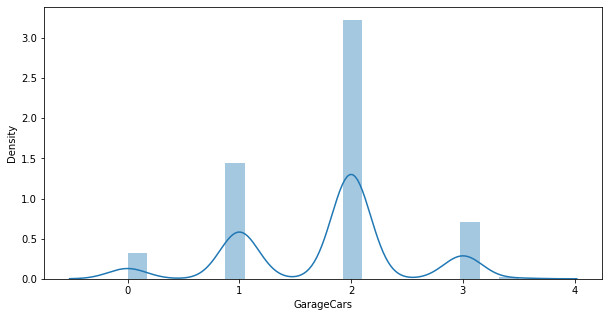

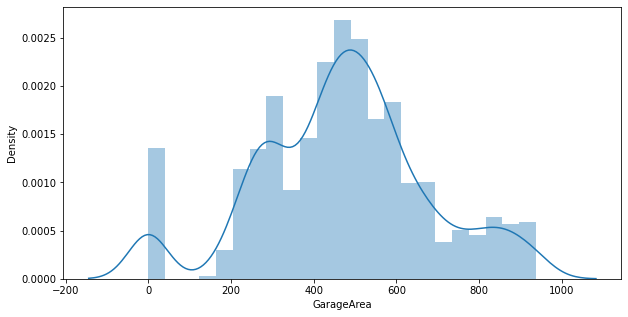

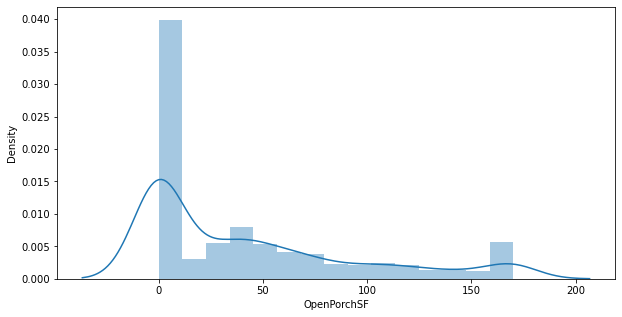

In [194]:
for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.figure(figsize = (10,5))
    sns.distplot(realestate[feature])
    plt.show()

Dropping the following features ['BsmtSF2','LowQualFinSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] as they do not give any insight into the dependent variable SalePrice.

In [195]:
realestate.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)
# Checking the remaining columns
realestate.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'Open

In [196]:
realestate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   float64
 18  YearBuil

#### Missing value handling for numeric values.

In [197]:
print("Feature : Percentage")
print("=====================================")
for f in realestate.select_dtypes(exclude=['object']).columns:
    if realestate[f].isnull().any():
        print(f, ' : ',  round(realestate[f].isnull().sum()/realestate.shape[0], 2)*100)

Feature : Percentage
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


Following features are high correlation value with each other hence analysing which one to retain.

In [198]:
realestate[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd']].describe()

,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd
count,1460.000000,1460.0,1379.000000,1460.000000,1460.000000
mean,0.425000,1.0,1978.506164,1971.299315,1984.865753
std,0.517373,0.0,24.689725,30.108397,20.645407
min,0.000000,1.0,1900.000000,1885.000000,1950.000000
25%,0.000000,1.0,1961.000000,1954.000000,1967.000000
50%,0.000000,1.0,1980.000000,1973.000000,1994.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000


In [199]:
#KitchenAbvGr doe not have helpful information contributing towards SalePrice hence dropping
realestate.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [200]:
realestate[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1379.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1971.299315,1984.865753,2007.815753
std,24.689725,30.108397,20.645407,1.328095
min,1900.000000,1885.000000,1950.000000,2006.000000
25%,1961.000000,1954.000000,1967.000000,2007.000000
50%,1980.000000,1973.000000,1994.000000,2008.000000
75%,2002.000000,2000.000000,2004.000000,2009.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


In [201]:
#converting year related value to number of years passed.
for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    realestate[feature] = 2021 - realestate[feature]
    
realestate.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,61,NaN,NaN,NaN,2,13,WD,Normal,208500
2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,...,298,0,NaN,NaN,NaN,5,14,WD,Normal,181500
3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,42,NaN,NaN,NaN,9,13,WD,Normal,223500
4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,35,NaN,NaN,NaN,2,15,WD,Abnorml,140000
5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,...,192,84,NaN,NaN,NaN,12,13,WD,Normal,250000


In [202]:
realestate[['GarageYrBlt','YearBuilt']]

,GarageYrBlt,YearBuilt
Id,,
1,18.0,18
2,45.0,45
3,20.0,20
4,23.0,106
5,21.0,21
...,...,...
1456,22.0,22
1457,43.0,43
1458,80.0,80


In [203]:
#it is obcerved that GarageYrBlt and YearBuilt has similar values hence we can drop GarageYrBlt
realestate.drop(['GarageYrBlt'], axis=1, inplace = True)

In [204]:
realestate = realestate[~realestate['MasVnrArea'].isnull()]

In [205]:
realestate.shape

(1452, 72)

In [208]:
realestate.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'PoolQC', 'Fence', 'M

In [209]:
# from the correlation heatmap it is observed that the correlation between (GarageCars and GarageArea),
#(TotRmsAbvGrd and GrLivArea) and (TotalBsmtSF and 1stflrSF) is very high hence we can drop one from each pair.
realestate.drop(['GarageCars', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)
realestate.shape

(1452, 69)

#### Analysing Categorical values.

In [210]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [211]:
categorical_df.columns.shape

(43,)

##### Handling the missing values in the categorical data frame

In [212]:
print("Feature : Percentage")
print("=====================================")
for f in realestate.select_dtypes(include=['object']).columns:
    if realestate[f].isnull().any():
        print(f, ':', round(realestate[f].isnull().sum()/realestate.shape[0], 2)*100)

Feature : Percentage
Alley : 94.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [213]:
print(realestate['Electrical'].isnull().sum())
print(realestate['PoolQC'].value_counts())

1
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


From the description given in data_description file for the data set it is feasible if we can replace null or NaN values with not applicable

In [214]:
#getting the count and creating a df to verify
impute_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(realestate[impute_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [215]:
# Imputing missing values with "N_A"
realestate[impute_categorical_features] = realestate[impute_categorical_features].fillna(value='N_A', axis=1)

# Checking after imputation
print(realestate[impute_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [216]:
realestate.shape

(1452, 69)

In [217]:
# dropping 'PoolQC' as it has high percentage of missing value and highly imbalance data after imputing.
realestate.drop(['PoolQC'], axis=1, inplace=True)

# Feature Electrical has very low number of missing values(1 row) hence the missing rows can be dropped
realestate.dropna(subset=['Electrical'], inplace=True)

In [218]:
realestate.shape

(1451, 68)

In [219]:
print("Feature : Percentage")
print("=====================================")
for f in realestate.columns:
    if realestate[f].isnull().any():
        print(f, ':', round(realestate[f].isnull().sum()/realestate.shape[0], 2)*100)

Feature : Percentage
LotFrontage : 18.0


In [220]:
realestate[['LotFrontage','MasVnrType','MasVnrArea']].describe()

,LotFrontage,MasVnrArea
count,1194.000000,1451.000000
mean,69.107203,90.254307
std,19.648510,134.950972
min,27.500000,0.000000
25%,59.000000,0.000000
50%,69.000000,0.000000
75%,80.000000,166.000000
max,111.500000,415.000000


In [221]:
#Creating a function to display box plot for the given features.
def create_boxplot(features):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(features):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(realestate['SalePrice'], realestate[feature])
        plt.tight_layout()

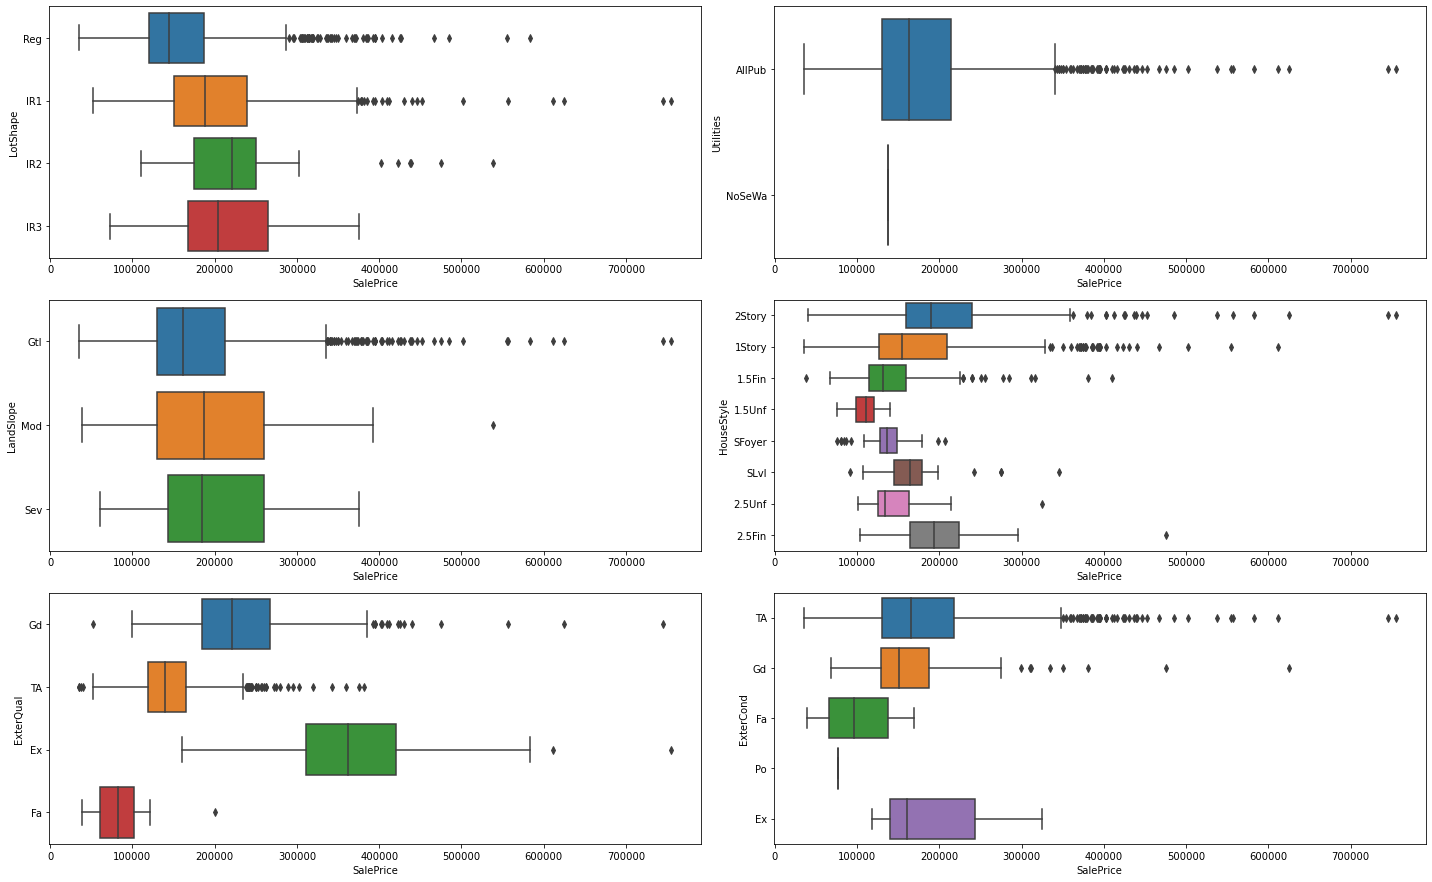

In [222]:
features_external = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']
create_boxplot(features_external)

1.It is observed that houses with excellent build quality that is material used have higher prices.
2.House with slope are lesser priced.
3.All the houses have all the utilities.
4.2 Storied houses have higher value.

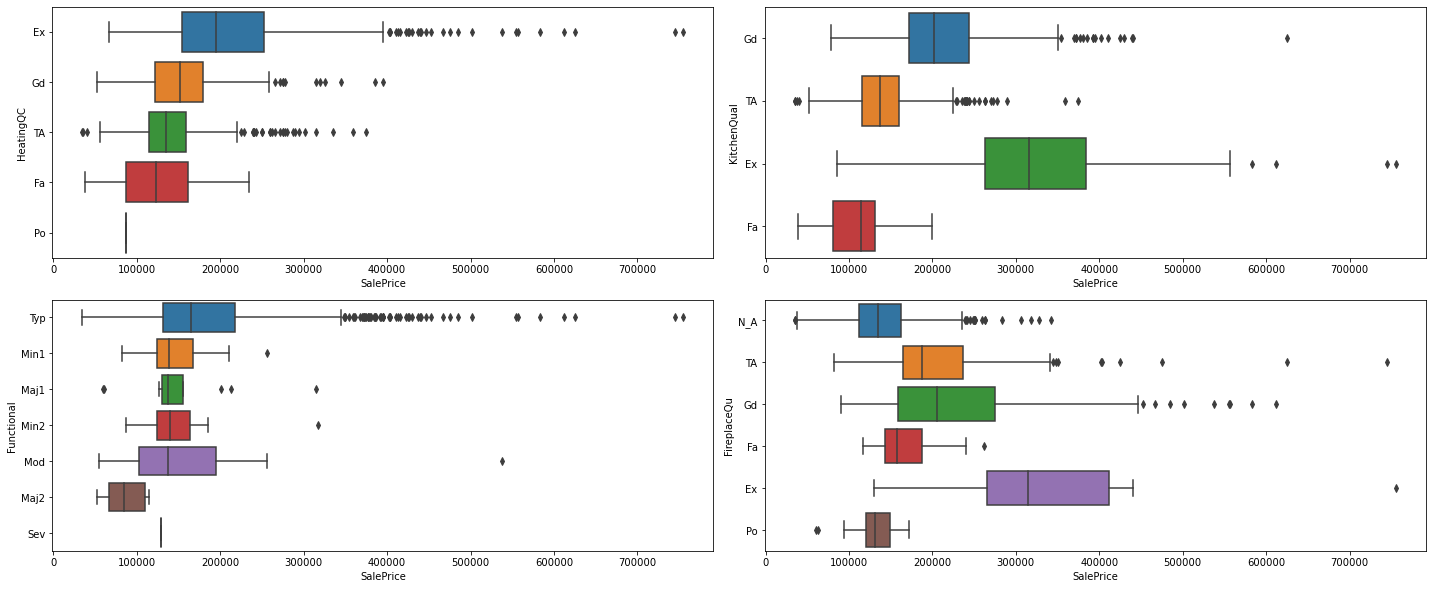

In [223]:
features_internal = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']
create_boxplot(features_internal)

1. Kitchen and Fireplace plays a major role in prices

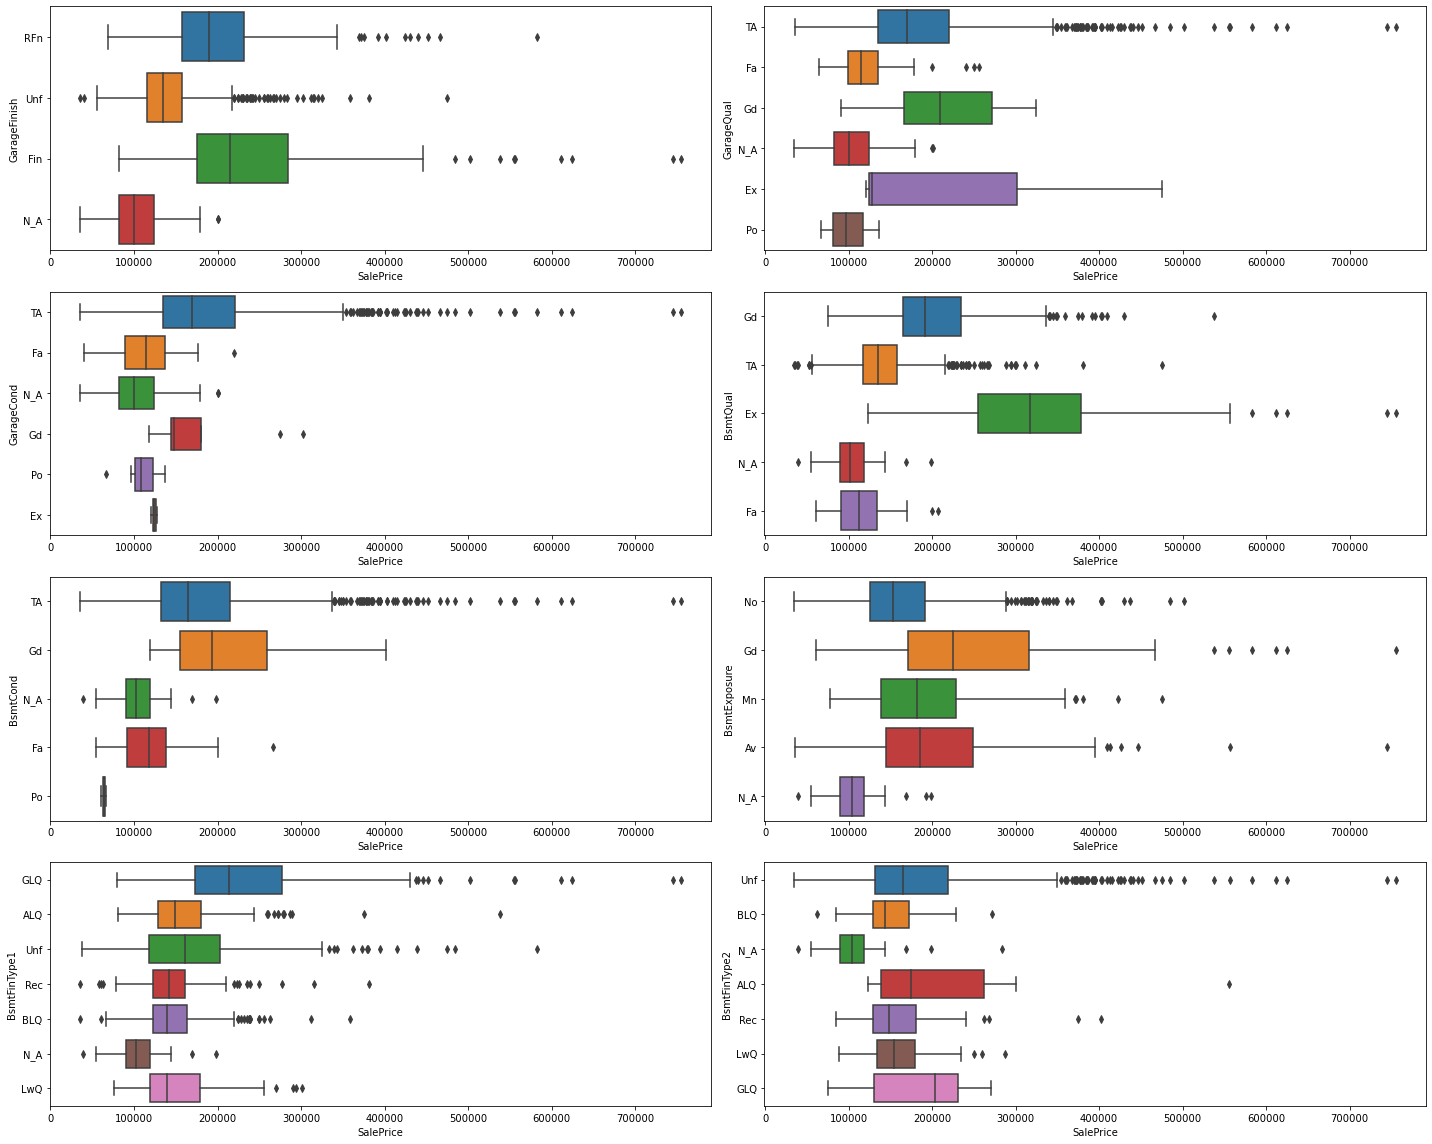

In [224]:
other_features = ['GarageFinish', 'GarageQual','GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
create_boxplot(other_features)

-The houses with completed garages had higher prices.
-Most of the houses have average kind of garages

-The houses with good basement get good price. -The living quarter influence the Price.

#### Encoding the categorical features.

In [225]:
realestate['LotShape'] = realestate['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
realestate['Utilities'] = realestate['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
realestate['LandSlope'] = realestate['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
realestate['HouseStyle'] = realestate['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
realestate['ExterQual'] = realestate['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
realestate['ExterCond'] = realestate['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
realestate['BsmtQual'] = realestate['BsmtQual'].map({'N_A':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
realestate['BsmtCond'] = realestate['BsmtCond'].map({'N_A':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
realestate['BsmtExposure'] = realestate['BsmtExposure'].map({'N_A':0,'No':1,'Mn':2,'Av':3,'Gd':4})
realestate['BsmtFinType1'] = realestate['BsmtFinType1'].map({'N_A':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
realestate['BsmtFinType2'] = realestate['BsmtFinType2'].map({'N_A':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
realestate['HeatingQC'] = realestate['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
realestate['CentralAir'] = realestate['CentralAir'].map({'N':0,'Y':1})
realestate['KitchenQual'] = realestate['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
realestate['GarageFinish'] = realestate['GarageFinish'].map({'N_A':0,'Unf':1,'RFn':2,'Fin':3})
realestate['GarageQual'] = realestate['GarageQual'].map({'N_A':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
realestate['GarageCond'] = realestate['GarageCond'].map({'N_A':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
realestate['Functional'] = realestate['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
realestate['FireplaceQu'] = realestate['FireplaceQu'].map({'N_A':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [226]:
# Checking the features after encoding

realestate[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 1 to 1460
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 247.7 KB


#### Analysing Unordered data

In [227]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

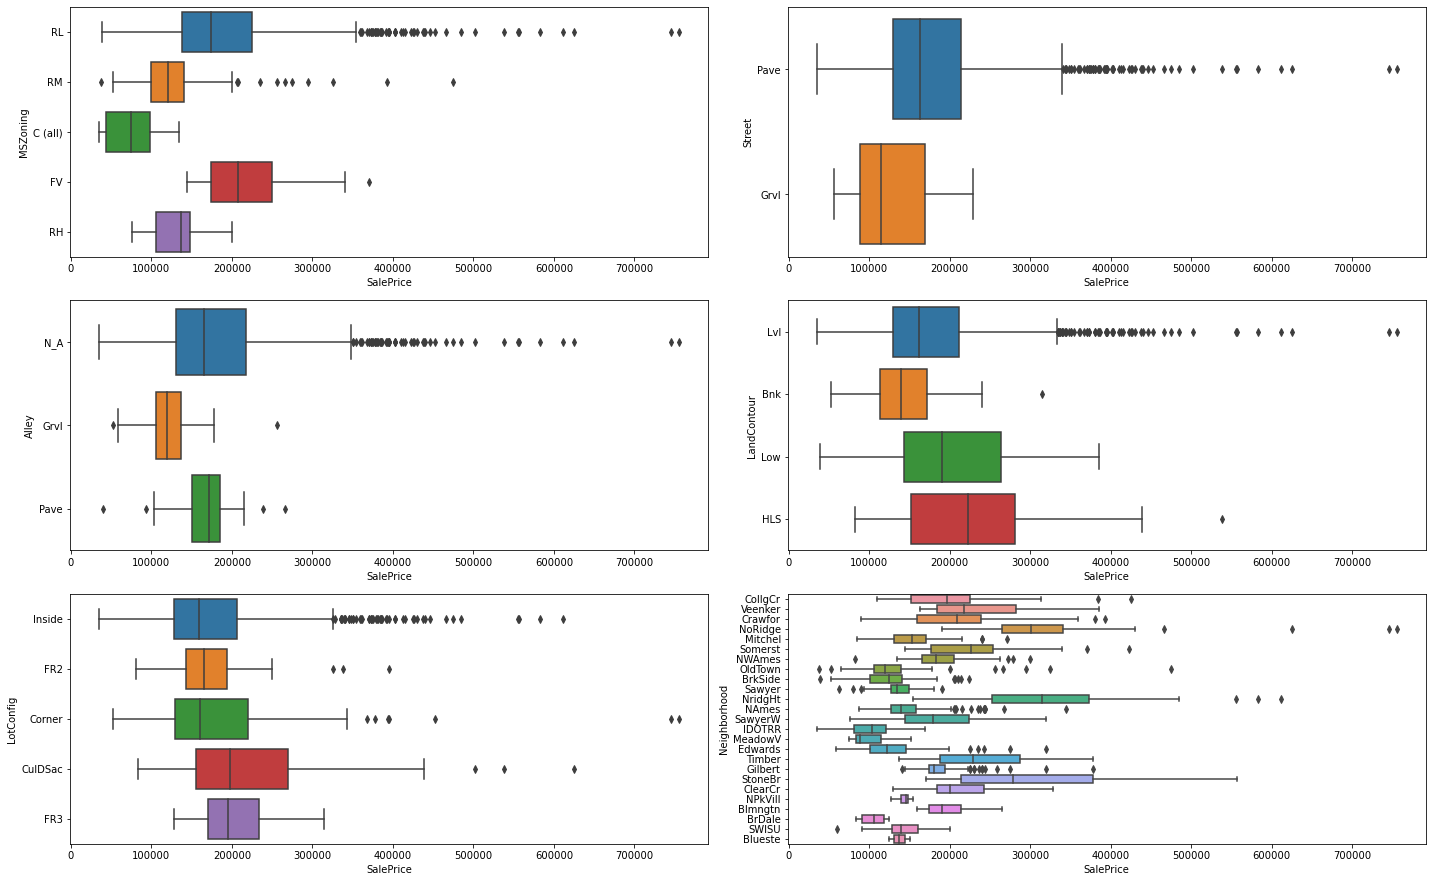

In [228]:
create_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

The most of the house doesn't have an alley.

The house segregated as MSZoning has higher price

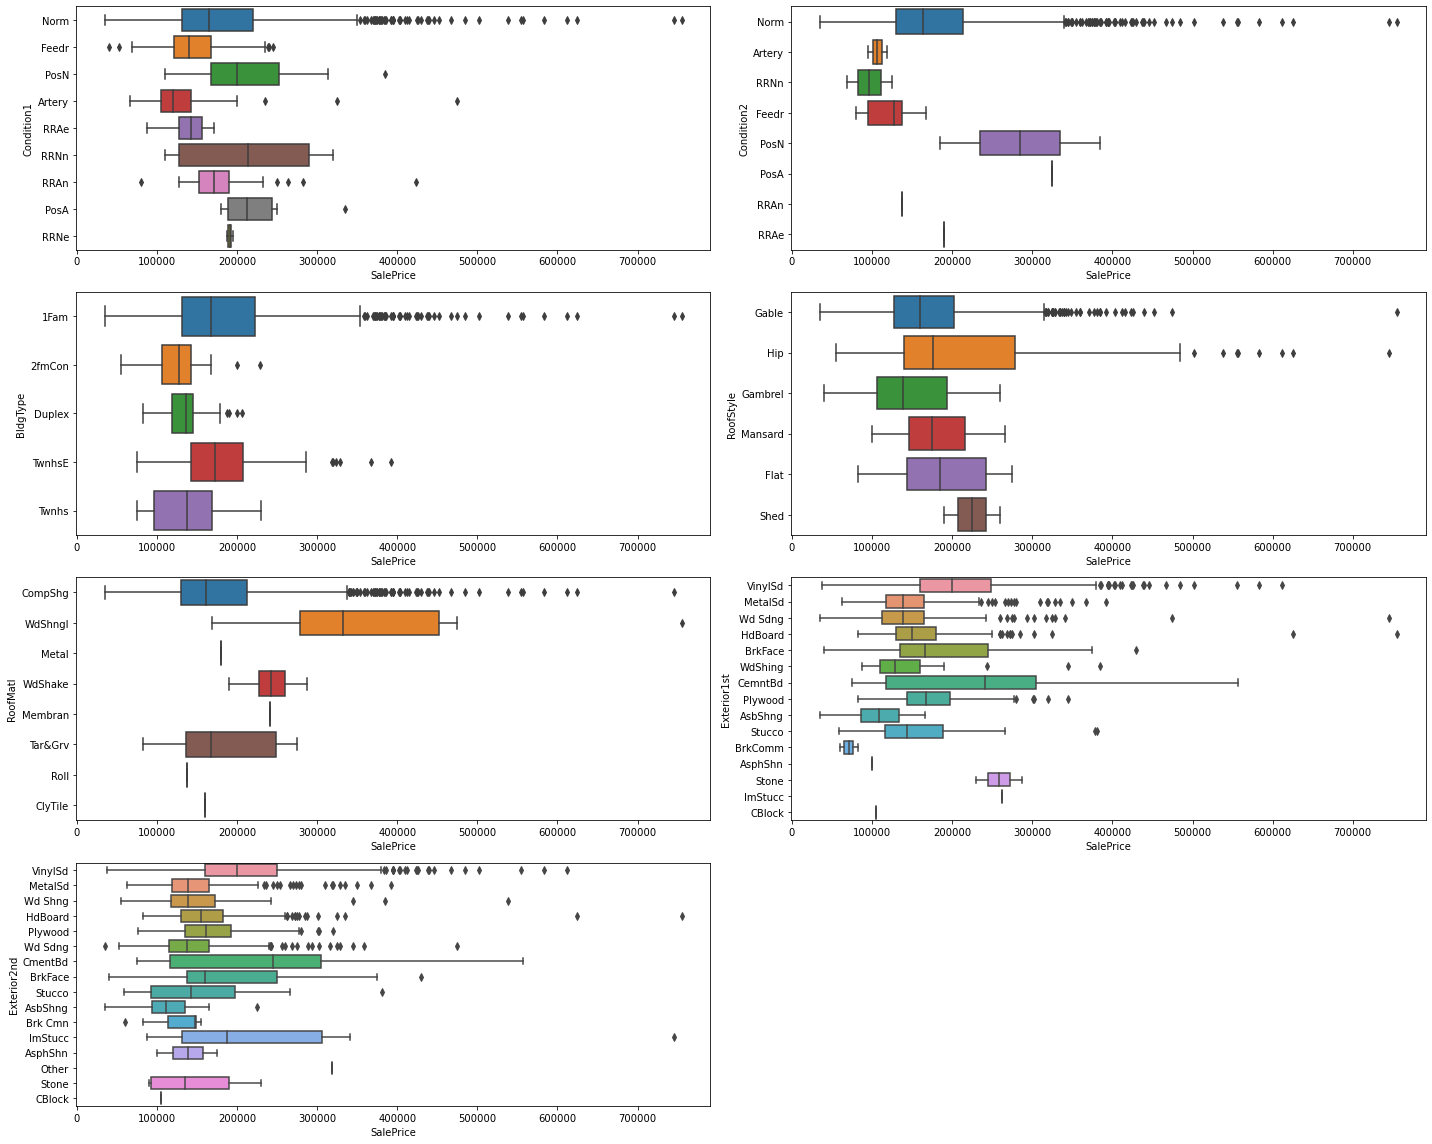

In [229]:
create_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

'RoofMatl', 'Exterior1st', 'Exterior2nd' Features do not have any contributing data towards explaining SalePrice

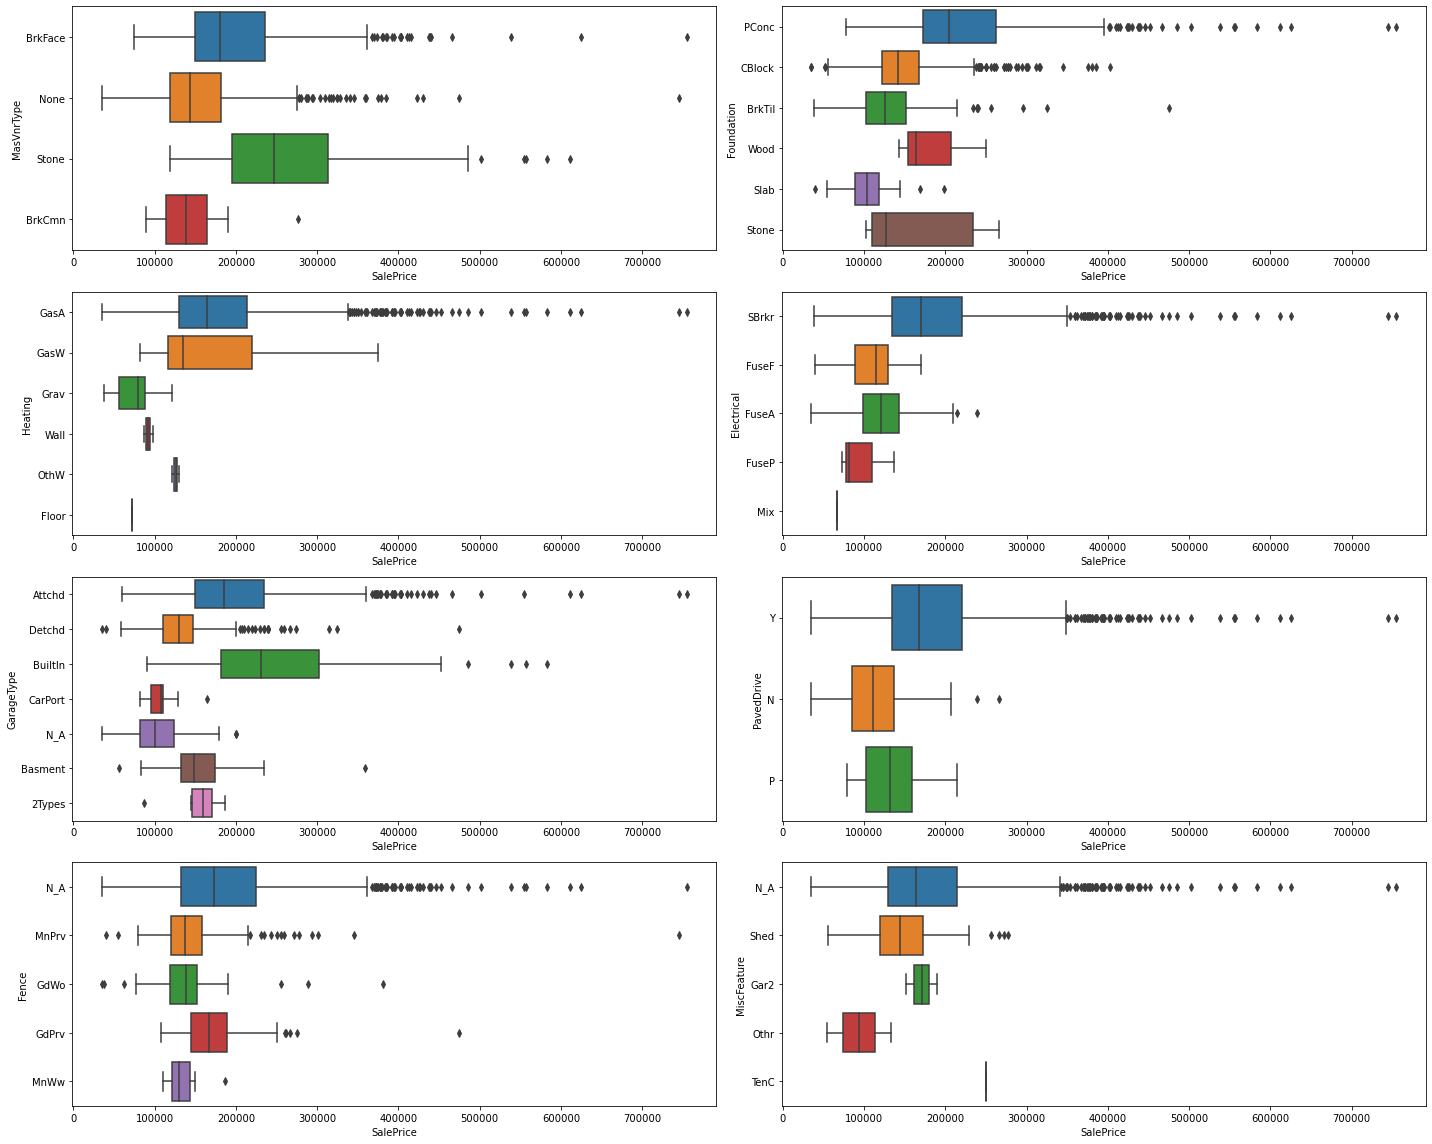

In [230]:
create_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

BuiltIn garageType had more SalePrice compared to others

Most Houses has Paved drive.

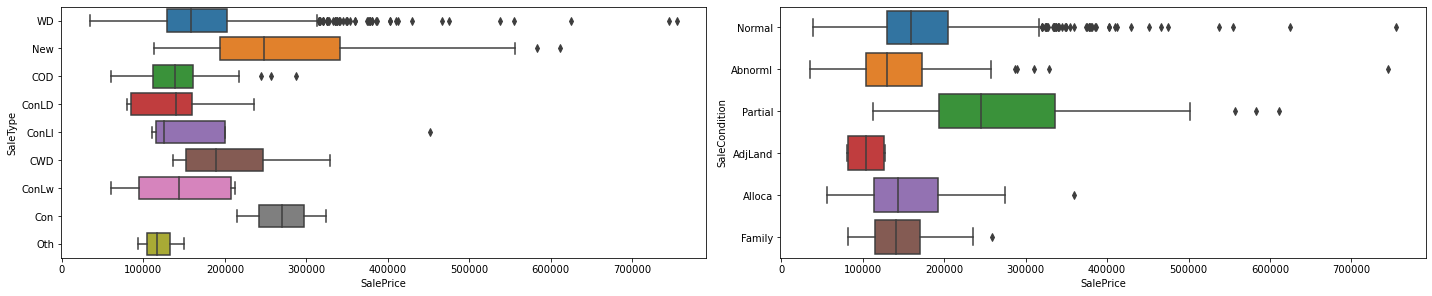

In [231]:
create_boxplot(['SaleType','SaleCondition'])

New houses tend to have higher value.

#### Encoding categorical variables

In [232]:
dummy_df = pd.get_dummies(realestate[unordered_features], drop_first=True)

In [233]:
dummy_df.shape

(1451, 144)

Adding 144 new columns would make the model very complex so dropping the columns with same data around 95 percent 

In [234]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [235]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)
dummy_df.shape

(1451, 52)

In [236]:
realestate.shape

(1451, 68)

In [237]:
#Concatinating the dummy variable and dropping the redudant(original) categorical variables.
realestate = pd.concat([realestate,dummy_df],axis=1)

realestate = realestate.drop(unordered_features,axis=1)

In [238]:
realestate.shape

(1451, 97)

### Splitting the data into train and test sets.

In [239]:
X = realestate.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_N_A,PavedDrive_Y,Fence_MnPrv,Fence_N_A,MiscFeature_N_A,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450.0,3,3,0,3,7,5.0,18,...,0,0,1,0,1,1,0,1,1,0
2,20,80.0,9600.0,3,3,0,0,6,7.5,45,...,0,0,1,0,1,1,0,1,1,0
3,60,68.0,11250.0,0,3,0,3,7,5.0,20,...,0,0,1,0,1,1,0,1,1,0
4,70,60.0,9550.0,0,3,0,3,7,5.0,106,...,1,0,1,0,1,1,0,1,0,0
5,60,84.0,14260.0,0,3,0,3,8,5.0,21,...,0,0,1,0,1,1,0,1,1,0


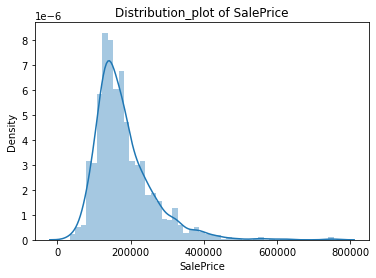

In [240]:
#Distribution plot od SalePrice
plt.title('Distribution_plot of SalePrice')
sns.distplot(realestate['SalePrice'])
plt.show()

The plot appears to be skewed towards right hence applying log to check if the skewness is rectified.

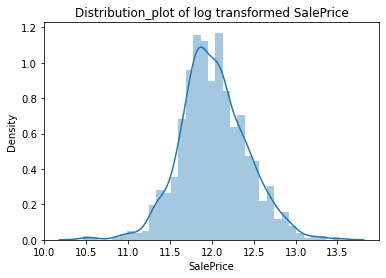

In [241]:
sns.distplot(np.log(realestate['SalePrice']))
plt.title('Distribution_plot of log transformed SalePrice')
plt.show()

Above plot appears to be normally distributedhence we can consider log transformed SalePrice for model building.

In [242]:
y = np.log(realestate['SalePrice'])
y

Id
1       12.247694
2       12.109011
3       12.317167
4       11.849398
5       12.429216
          ...    
1456    12.072541
1457    12.254863
1458    12.493130
1459    11.864462
1460    11.901583
Name: SalePrice, Length: 1451, dtype: float64

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [244]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1088, 96)
(363, 96)
(1088,)
(363,)


In [245]:
X['LotFrontage'].isnull().any()

True

In [246]:
sim_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
sim_imp.fit(X_train[['LotFrontage']])

SimpleImputer()

In [247]:
X_train[['LotFrontage']] = sim_imp.transform(X_train[['LotFrontage']])

In [248]:
X_test[['LotFrontage']] = sim_imp.transform(X_test[['LotFrontage']])

#### Scaling the Features

In [249]:
X_train.values

array([[2.00000000e+01, 8.50000000e+01, 6.97000000e+03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.00000000e+01, 6.92272222e+01, 1.05300000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.00000000e+01, 6.00000000e+01, 6.60000000e+03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [5.00000000e+01, 5.00000000e+01, 9.00000000e+03, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.00000000e+01, 4.80000000e+01, 1.06350000e+04, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.00000000e+01, 6.70000000e+01, 1.06560000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [250]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [251]:
X_tr_scaled = pd.DataFrame(data=std_scaler.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=std_scaler.transform(X_test), columns=X_test.columns)

In [252]:
#Scaled features
print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0      -0.938693     0.883929 -0.734416  0.745800   0.030331  -0.225869   
1      -0.938693     0.000000  0.257449 -1.389543   0.030331  -0.225869   
2      -0.938693    -0.517107 -0.837503  0.745800   0.030331  -0.225869   
3      -0.134205    -1.077521 -0.334605  0.745800   0.030331  -0.225869   
4       1.742935     0.000000 -1.440701  0.745800   0.030331  -0.225869   
...          ...          ...       ...       ...        ...        ...   
1083    0.133958     0.659764  0.372795 -1.389543   0.030331  -0.225869   
1084    2.413342    -2.338454 -2.231686  0.745800   0.030331  -0.225869   
1085   -0.134205    -1.077521 -0.168830  0.745800   0.030331  -0.225869   
1086   -0.938693    -1.189604  0.286703 -0.677762   0.030331  -0.225869   
1087   -0.938693    -0.124817  0.292554 -1.389543   0.030331  -0.225869   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0      -0.843033  

#### Initial feature selection using RFE

In [253]:
#Creating a function to select top n feature using RFE
def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [254]:
top_30 = top_n_features(30)
top_35 = top_n_features(35)
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 30 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'Functional', 'Fireplaces', 'GarageArea', 'MSZoning_RL', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 35 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'MasVnrType_BrkFace', 'MasVnrType

In [255]:
# creating  a function to give the summary model with the given data and features.
def regression_summary(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    reg_sum = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(reg_sum.summary())

In [256]:
regression_summary(X_tr_scaled,y_train,top_30)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     358.7
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:03:44   Log-Likelihood:                 785.52
No. Observations:                1088   AIC:                            -1509.
Df Residuals:                    1057   BIC:                            -1354.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [257]:
regression_summary(X_tr_scaled,y_train,top_35)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     313.6
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:04:01   Log-Likelihood:                 797.62
No. Observations:                1088   AIC:                            -1523.
Df Residuals:                    1052   BIC:                            -1344.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [259]:
regression_summary(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     249.1
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:04:18   Log-Likelihood:                 812.96
No. Observations:                1088   AIC:                            -1534.
Df Residuals:                    1042   BIC:                            -1304.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [260]:
regression_summary(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     226.7
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:04:26   Log-Likelihood:                 820.73
No. Observations:                1088   AIC:                            -1539.
Df Residuals:                    1037   BIC:                            -1285.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [261]:
regression_summary(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     214.5
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:04:36   Log-Likelihood:                 823.78
No. Observations:                1088   AIC:                            -1540.
Df Residuals:                    1034   BIC:                            -1270.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.02

In [265]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
    if model == 'ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    
    model_cv = GridSearchCV(estimator = estimator_model, param_grid = params, scoring= 'neg_mean_absolute_error', 
                                cv = 5, return_train_score=True,verbose = 1)            
    model_cv.fit(X_train, y_train)
    alpha = model_cv.best_params_["alpha"]
    print("Optimum alpha for %s is %f" %(model, alpha))
    final_model = model_cv.best_estimator_

    final_model.fit(X_train, y_train)
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
    print(model," Regression with ",alpha)
    print("===================================")
    print('R2 score (train) : ',r2_score(y_train,y_train_pred))
    print('R2 score (test) : ',r2_score(y_test,y_test_pred))
    print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

    return final_model, y_test_pred

### Ridge Regression

In [273]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted_r_1 = build_model(X_tr_scaled[top_50], y_train, X_te_scaled[top_50], params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9157965743224077
R2 score (test) :  0.8770103737078535
RMSE (train) :  0.11405382826685082
RMSE (test) :  0.14649506802176412


### Lasso Regression

In [274]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted_l_1 = build_model(X_tr_scaled[top_50], y_train, X_te_scaled[top_50], params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9150412783502796
R2 score (test) :  0.8800077292923839
RMSE (train) :  0.11456421178980816
RMSE (test) :  0.1446989563517844


In [275]:
coefficients = pd.DataFrame(index=X_te_scaled[top_50].columns)
coefficients.rows = X_te_scaled[top_50].columns

coefficients['Ridge (alpha=20)'] = ridge_final_model.coef_
coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
coefficients

,Ridge (alpha=20),Lasso (alpha=0.001)
LotFrontage,0.009283,0.006789
LotArea,0.029072,0.029296
LandSlope,0.013172,0.012959
OverallQual,0.074923,0.077818
OverallCond,0.049472,0.050753
YearBuilt,-0.037902,-0.041936
ExterQual,0.014483,0.013505
BsmtQual,0.019675,0.021892
BsmtExposure,0.011517,0.010464
BsmtFinSF1,0.034524,0.029934


verifing if the model would give any better result if number of features are increased.

In [270]:
top_60 = top_n_features(60)
regression_summary(X_tr_scaled,y_train,top_60)
params_60_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge_final_model, y_test_predicted = build_model(X_tr_scaled[top_60], y_train, X_te_scaled[top_60], params_60_ridge, model='ridge')
params_60_lasso = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}
lasso_final_model, y_test_predicted = build_model(X_tr_scaled[top_60], y_train, X_te_scaled[top_60], params_60_lasso, model='lasso')

Top 60 features : 
['LotFrontage', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF', 'YrSold', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_N_A', 'PavedDriv

Optimum alpha for ridge is 20.000000
ridge  Regression with  20
R2 score (train) :  0.9168232890758504
R2 score (test) :  0.8801561606382542
RMSE (train) :  0.11335635129163563
RMSE (test) :  0.14460943180619906
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9158346915453391
R2 score (test) :  0.8824080968484435
RMSE (train) :  0.11402801039025122
RMSE (test) :  0.14324434055104363


the last block is to check if the model would give any better result if we selected more features but it does not improve
hence considering 50 features are optimum and Alpha for ridge is 20 and for Lasso it is 0.001

In [276]:
test_prediction = np.round(np.exp(y_test_predicted_l_1)).astype(int)
print(test_prediction[:5])

[293393 226058 139478 118432 151734]


Top 50 features used for model building

In [277]:
coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

,Lasso (alpha=0.001)
1stFlrSF,0.123526
2ndFlrSF,0.101111
OverallQual,0.077818
OverallCond,0.050753
SaleCondition_Partial,0.033648
BsmtFinSF1,0.029934
LotArea,0.029296
SaleCondition_Normal,0.027621
Condition1_Norm,0.024138
Fireplaces,0.023000


In [279]:
#Top ten features influencing the SalePrice are as follows
coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond',
       'SaleCondition_Partial', 'BsmtFinSF1', 'LotArea',
       'SaleCondition_Normal', 'Condition1_Norm', 'Fireplaces'],
      dtype='object')

Code for subjective questions

In [280]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [281]:
ridge_model_sqc_1 = Ridge(alpha=40.0)
ridge_model_sqc_1.fit(X_train_rfe, y_train)

y_train_pred_sqc_1 = ridge_model_sqc_1.predict(X_train_rfe)
y_test_pred_sqc_1 = ridge_model_sqc_1.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=40.0")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred_sqc_1), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred_sqc_1), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred_sqc_1)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred_sqc_1)), 4))

Model Evaluation : Ridge Regression, alpha=40.0
R2 score (train) :  0.9151
R2 score (test) :  0.8775
RMSE (train) :  0.1145
RMSE (test) :  0.1462


In [283]:
lasso_model_sqc_1 = Lasso(alpha=0.002)
lasso_model_sqc_1.fit(X_train_rfe, y_train)
y_train_pred_sqc_2 = lasso_model_sqc_1.predict(X_train_rfe)
y_test_pred_sqc_2 = lasso_model_sqc_1.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred_sqc_2), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred_sqc_2), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred_sqc_2)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred_sqc_2)), 4))

Model Evaluation : Lasso Regression, alpha=0.002
R2 score (train) :  0.9141
R2 score (test) :  0.8812
RMSE (train) :  0.1152
RMSE (test) :  0.144


In [288]:
coefficients['Ridge (alpha = 40.0)'] = ridge_model_sqc_1.coef_
coefficients['Lasso (alpha = 0.002)'] = lasso_model_sqc_1.coef_
pd.set_option('display.max_rows', None)
coefficients

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
LotFrontage,0.009283,0.006789,0.009994,0.005845,0.009994,0.005845
LotArea,0.029072,0.029296,0.029535,0.029596,0.029535,0.029596
LandSlope,0.013172,0.012959,0.013122,0.012161,0.013122,0.012161
OverallQual,0.074923,0.077818,0.074334,0.080105,0.074334,0.080105
OverallCond,0.049472,0.050753,0.047927,0.049344,0.047927,0.049344
YearBuilt,-0.037902,-0.041936,-0.033353,-0.039718,-0.033353,-0.039718
ExterQual,0.014483,0.013505,0.016255,0.014718,0.016255,0.014718
BsmtQual,0.019675,0.021892,0.020032,0.023934,0.020032,0.023934
BsmtExposure,0.011517,0.010464,0.011765,0.009158,0.011765,0.009158
BsmtFinSF1,0.034524,0.029934,0.035131,0.027589,0.035131,0.027589


In [289]:
coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head(1)

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
1stFlrSF,0.114062,0.123526,0.10664,0.123276,0.10664,0.123276


In [290]:
coefficients.sort_values(by='Ridge (alpha = 40.0)', ascending=False).head(1)

,Ridge (alpha=20),Lasso (alpha=0.001),Ridge (alpha = 18.0),Lasso (alpha = 0.0002),Ridge (alpha = 40.0),Lasso (alpha = 0.002)
1stFlrSF,0.114062,0.123526,0.10664,0.123276,0.10664,0.123276


In [291]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial'], axis=1)

In [292]:
lasso_model_new = Lasso(alpha=0.001)
lasso_model_new.fit(X_train_new, y_train)
y_train_pred = lasso_model_new.predict(X_train_new)
y_test_pred = lasso_model_new.predict(X_test_new)

In [294]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model_new.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)

,Lasso
FullBath,0.081933
BsmtFinSF1,0.076058
HalfBath,0.057935
GarageArea,0.054891
ExterQual,0.054780
